In [1]:
import pickle
import matplotlib.pyplot as plt
import sqlite3
from pathlib import Path

from shared_elements import read_party_report_table

In [2]:
data_path = Path("/home/craig/ffxiv-repos/how_bad_was_my_crit_in_xiv/data")

read_party_report_table()

,party_analysis_id,report_id,fight_id,analysis_id_1,analysis_id_2,analysis_id_3,analysis_id_4,analysis_id_5,analysis_id_6,analysis_id_7,analysis_id_8
0,c8193ad1-5346-48f6-9aa6-1d4c76d04d8c,vLCj2HyYkZRXBxbP,46,03f37f1f-78eb-4544-8561-7a32bd180c65,29077110-f645-41c4-883b-fcad9b745057,a0a8d103-411f-482f-8d43-512364d60c14,c95a6a40-e23c-464c-97a3-b13451b23d42,e0c176a0-8c4c-4155-8cf2-4b5f5dceb900,e3b3b968-e966-4354-af1a-ee299f010401,92259b52-49de-4ab4-b47c-f76a5cd4fbf9,8588b319-b32d-4c57-8760-5e35013559f4


In [3]:
with open(
    data_path
    / "blobs/party-analyses/party-analysis-c8193ad1-5346-48f6-9aa6-1d4c76d04d8c.pkl",
    "rb",
) as f:
    party_rotation = pickle.load(f)

## Current situation

Focus on clipping of 2.5 seconds.

This is what we'll compare against because it looks like too much damage is getting convolved out.

(34000000.0, 38000000.0)

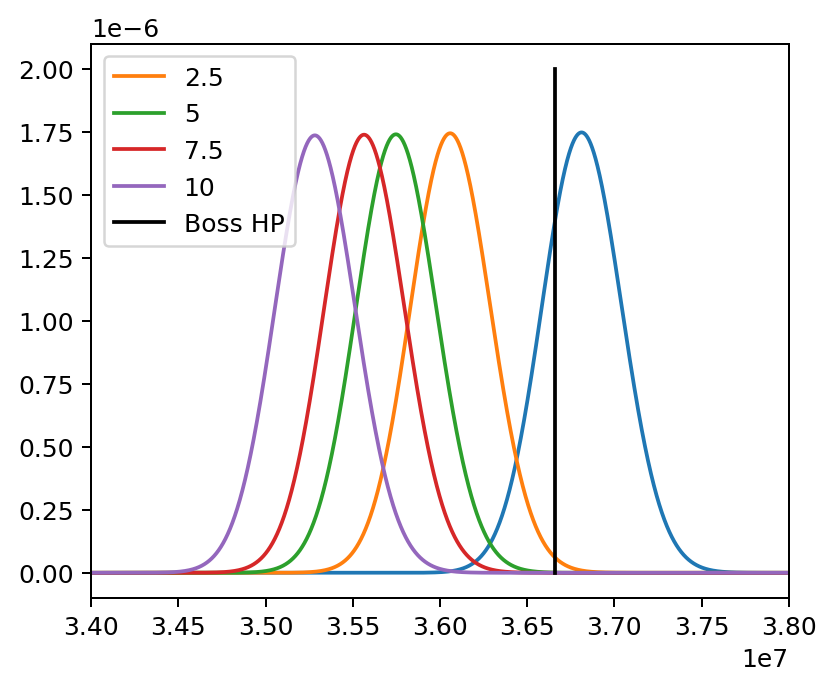

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=180)
plt.plot(party_rotation.party_damage_support, party_rotation.party_damage_distribution)
for p in party_rotation.shortened_rotations:
    plt.plot(
        p.shortened_damage_support,
        p.shortened_damage_distribution,
        label=p.seconds_shortened,
    )

plt.plot([36660084, 36660084], [0, 2e-6], color="k", label="Boss HP")
plt.legend()
plt.xlim([3.4e7, 3.8e7])

In [5]:
party_rotation.__dict__.keys()

dict_keys(['party_id', 'boss_hp', 'party_damage_distribution', 'party_damage_support', 'shortened_rotations', 'percentile'])

In [6]:
analyses = (
    "03f37f1f-78eb-4544-8561-7a32bd180c65",
    "29077110-f645-41c4-883b-fcad9b745057",
    "a0a8d103-411f-482f-8d43-512364d60c14",
    "c95a6a40-e23c-464c-97a3-b13451b23d42",
    "e0c176a0-8c4c-4155-8cf2-4b5f5dceb900",
    "e3b3b968-e966-4354-af1a-ee299f010401",
    "92259b52-49de-4ab4-b47c-f76a5cd4fbf9",
    "8588b319-b32d-4c57-8760-5e35013559f4",
)
a = analyses[6]
with open(data_path / f"blobs/rotation-object-{a}.pkl", "rb") as f:
    rotation = pickle.load(f)

with open(
    data_path / "blobs" / "job-rotation-clippings" / f"rotation-clippings-{a}.pkl", "rb"
) as f:
    clipping = pickle.load(f)
rotation.actions_df.tail(8)

,timestamp,elapsed_time,type,sourceID,targetID,abilityGameID,ability_name,buffs,amount,tick,...,action_name,p_n,p_c,p_d,p_cd,main_stat_add,l_c,normalized_damage,relative_damage,pp_buff
672,1714440265215,413.053,damage,1,10,1001200,Caustic Bite (tick),"[1000125, 1000141, 1000638, 1001221, 1001878, ...",1908,True,...,Caustic Bite (tick)-1000125_1000141_1000638_10...,0.315673,0.211327,0.283327,0.189673,262,1631.0,1410.845021,NaN,NaN
673,1714440265437,413.275,calculateddamage,1,10,16495,Burst Shot,[1002216],11196,NaN,...,Burst Shot-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,11196.000000,NaN,NaN
674,1714440266952,414.790,calculateddamage,1,10,8,Shot,[1002216],2605,NaN,...,Shot-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,2605.000000,NaN,NaN
675,1714440267887,415.725,calculateddamage,1,10,16495,Burst Shot,[1002216],9051,NaN,...,Burst Shot-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,9051.000000,NaN,NaN
676,1714440268245,416.083,damage,1,10,1001201,Stormbite (tick),"[1000125, 1000141, 1000638, 1001221, 1001878, ...",1876,True,...,Stormbite (tick)-1000125_1000141_1000638_10012...,0.315673,0.211327,0.283327,0.189673,262,1631.0,1387.183050,NaN,NaN
677,1714440268245,416.083,damage,1,10,1001200,Caustic Bite (tick),"[1000125, 1000141, 1000638, 1001221, 1001878, ...",1497,True,...,Caustic Bite (tick)-1000125_1000141_1000638_10...,0.315673,0.211327,0.283327,0.189673,262,1631.0,1106.936581,NaN,NaN
678,1714440268871,416.709,calculateddamage,1,10,3558,Empyreal Arrow,[1002216],9884,NaN,...,Empyreal Arrow-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,9884.000000,NaN,NaN
679,1714440270029,417.867,calculateddamage,1,10,8,Shot,[1002216],5612,NaN,...,Shot-1002216,0.508173,0.218827,0.190827,0.082173,0,1631.0,5612.000000,NaN,NaN


In [7]:
rotation.make_rotation_df(rotation.actions_df, t_end_clip=2.5, return_clipped=False)

,action_name,base_action,n,p_n,p_c,p_d,p_cd,buffs,l_c,main_stat_add,potency,damage_type
115,Apex Arrow-1002217,Apex Arrow,3,0.522713,0.204287,0.196287,0.076713,1.01000,1631.0,0,450,direct
119,Apex Arrow-1000141_1000638_1002216_1002964_Rad...,Apex Arrow,1,0.368373,0.158627,0.330627,0.142373,1.28000,1631.0,0,450,direct
121,Apex Arrow-1000141_1000638_1001221_1001878_100...,Apex Arrow,1,0.315673,0.211327,0.283327,0.189673,1.36000,1631.0,0,450,direct
117,Apex Arrow-1000125_1000141_1000638_1002216_100...,Apex Arrow,1,0.368373,0.158627,0.330627,0.142373,1.27619,1631.0,262,450,direct
114,Army's Paeon-1002217,Army's Paeon,3,0.522713,0.204287,0.196287,0.076713,1.01000,1631.0,0,100,direct
...,...,...,...,...,...,...,...,...,...,...,...,...
32,Stormbite (tick)-1000049,Stormbite (tick),6,0.522713,0.204287,0.196287,0.076713,1.00000,1631.0,262,25,physical-dot
134,the Wanderer's Minuet-1002218,the Wanderer's Minuet,1,0.501143,0.195857,0.217857,0.085143,1.00000,1631.0,0,100,direct
131,the Wanderer's Minuet-1000049_1002218,the Wanderer's Minuet,1,0.501143,0.195857,0.217857,0.085143,1.00000,1631.0,262,100,direct
132,the Wanderer's Minuet-1000049,the Wanderer's Minuet,1,0.522713,0.204287,0.196287,0.076713,1.00000,1631.0,262,100,direct


In [8]:
clipping.rotation_clipping[0]

,action_name,base_action,n,p_n,p_c,p_d,p_cd,buffs,l_c,main_stat_add,potency,damage_type,d2,is_dot
0,Empyreal Arrow-1002216,Empyreal Arrow,1,0.508173,0.218827,0.190827,0.082173,1.0,1631.0,0,240,direct,9440.0,0
1,Shot-1002216,Shot,1,0.508173,0.218827,0.190827,0.082173,1.0,1631.0,0,80,auto,2664.0,0


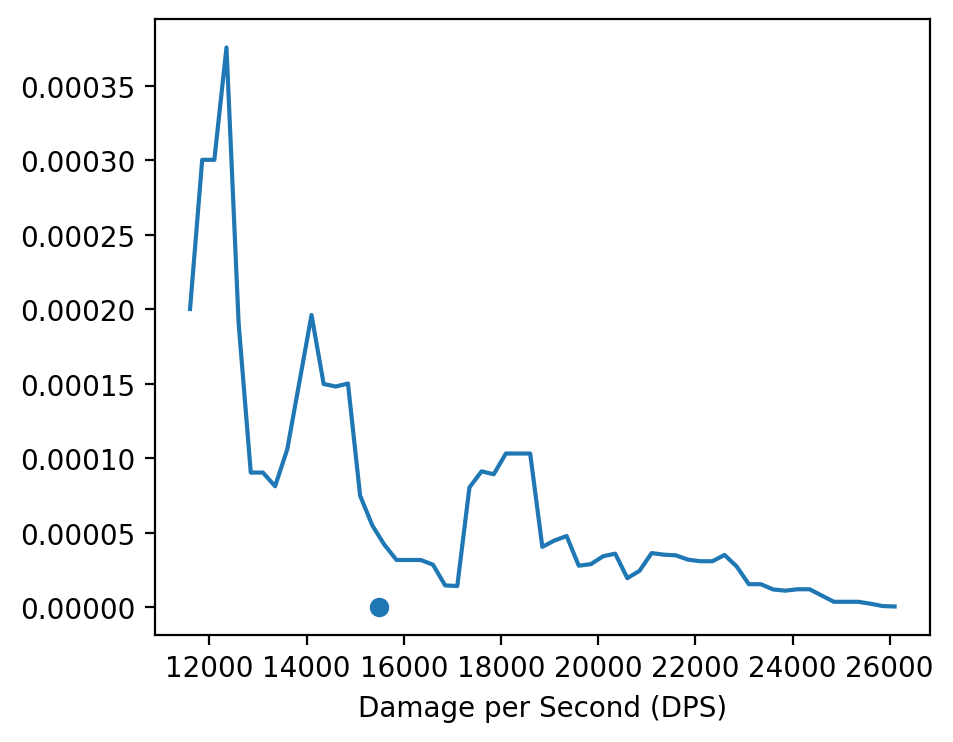

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=200)
clipping.analysis_clipping[0].plot_rotation_distribution(ax=ax)
ax.scatter([9884 + 5614], [0])

## New method method with fewer moving parts

Recompute the entire rotation for each job with just the last few seconds removed from the rotation DF.

In [10]:
from shared_elements import read_report_table, read_encounter_table
import numpy as np

job_mapping = (
    read_encounter_table()
    .merge(read_report_table(), on=["report_id", "fight_id", "player_name", "job"])[
        [
            "analysis_id",
            "job",
            "role",
            "main_stat",
            "secondary_stat",
            "determination",
            "speed",
            "critical_hit",
            "direct_hit",
            "weapon_damage",
            "delay",
            "main_stat_pre_bonus",
        ]
    ]
    .set_index("analysis_id")
    .to_dict("index")
)

In [11]:
from shared_elements import rotation_analysis
from ffxiv_stats import Rotation
import pandas as pd

job_analyses = []
clipped_job_analyses = {2.5: [], 5: [], 7.5: [], 10: []}
truncated_rotation_analyses = {2.5: [], 5: [], 7.5: [], 10: []}

rotation_remains = {2.5: [], 5: [], 7.5: [], 10: []}
rotation_truancated = {2.5: [], 5: [], 7.5: [], 10: []}

saved_rotation_mean = 0

t_clip = [2.5, 5, 7.5, 10]

# for t_clip in [0, 5, 10]:
for idx, a in enumerate(analyses):
    print(a)
    with open(data_path / f"blobs/rotation-object-{a}.pkl", "rb") as f:
        rotation = pickle.load(f)

    with open(data_path / "blobs" / f"job-analysis-object-{a}.pkl", "rb") as f:
        job_object = pickle.load(f)

    saved_rotation_mean += job_object.rotation_mean

    with open(
        data_path / "blobs" / "job-rotation-clippings" / f"rotation-clippings-{a}.pkl",
        "rb",
    ) as f:
        clipping = pickle.load(f)

    # clipped_rotation = rotation.make_rotation_df(
    #     rotation.actions_df, t_end_clip=t_clip, return_clipped=False
    # )

    whole_rotation = rotation.make_rotation_df(rotation.actions_df)
    whole_rotation = rotation.rotation_df

    stats = (
        1,
        job_mapping[a]["main_stat"],
        job_mapping[a]["secondary_stat"],
        job_mapping[a]["determination"],
        job_mapping[a]["speed"],
        job_mapping[a]["critical_hit"],
        job_mapping[a]["direct_hit"],
        job_mapping[a]["weapon_damage"],
        job_mapping[a]["delay"],
        job_mapping[a]["main_stat_pre_bonus"],
    )

    job_analyses.append(
        rotation_analysis(
            job_mapping[a]["role"],
            job_mapping[a]["job"],
            whole_rotation,
            *stats,
            rotation_delta=20,
            rotation_step=20,
            compute_mgf=False,
            action_delta=2,
        )
    )

    for t in t_clip:
        print(t)

        # rotation_truancated[t].append(
        #     rotation.make_rotation_df(
        #         rotation.actions_df, t_end_clip=t, return_clipped=False
        #     )
        # )

        # truncated_rotation_analyses[t].append(
        #     rotation_analysis(
        #         job_mapping[a]["role"],
        #         job_mapping[a]["job"],
        #         rotation_truancated[t][-1],
        #         *stats,
        #         rotation_delta=20,
        #         rotation_step=20,
        #         compute_mgf=True,
        #         action_delta=2,
        #     )
        # )

        rotation_remains[t].append(
            rotation.make_rotation_df(
                rotation.actions_df, t_end_clip=t, return_clipped=True
            )
        )

        if rotation_remains[t][-1] is not None:
            clipped_job_analyses[t].append(
                rotation_analysis(
                    job_mapping[a]["role"],
                    job_mapping[a]["job"],
                    rotation_remains[t][-1],
                    *stats,
                    rotation_delta=20,
                    rotation_step=20,
                    compute_mgf=True,
                    action_delta=2,
                )
            )

03f37f1f-78eb-4544-8561-7a32bd180c65
2.5
5
7.5
10
29077110-f645-41c4-883b-fcad9b745057
2.5
5
7.5
10
a0a8d103-411f-482f-8d43-512364d60c14
2.5
5
7.5
10
c95a6a40-e23c-464c-97a3-b13451b23d42
2.5
5
7.5
10
e0c176a0-8c4c-4155-8cf2-4b5f5dceb900
2.5
5
7.5
10
e3b3b968-e966-4354-af1a-ee299f010401
2.5
5
7.5
10
92259b52-49de-4ab4-b47c-f76a5cd4fbf9
2.5
5
7.5
10
8588b319-b32d-4c57-8760-5e35013559f4
2.5
5
7.5
10


One accuracy culprit is `action_delta`, which needs to be quite small for accurate moments. This thankfully doesn't have a large impact on performance.

In [95]:
[
    np.trapz(
        job_analyses[idx].rotation_dps_support
        * job_analyses[idx].rotation_dps_distribution,
        job_analyses[idx].rotation_dps_support,
    )
    - job_analyses[idx].rotation_mean
    for idx in range(8)
]

[-113.65966057917103,
 -53.99098717560992,
 -21.819798935204744,
 -26.604833498597145,
 -117.01697807386518,
 -126.31378995906562,
 -72.78819224704057,
 -387.3694955930114]

Compute means, which should be exact because they're from MGFs

In [17]:
clip_means = np.array(
    [sum([j.rotation_mean for j in clipped_job_analyses[t]]) for t in t_clip]
)

truncated_means = np.array(
    [sum([j.rotation_mean for j in truncated_rotation_analyses[t]]) for t in t_clip]
)

truncated_variances = np.array(
    [sum([j.rotation_variance for j in truncated_rotation_analyses[t]]) for t in t_clip]
)

truncated_std = np.sqrt(truncated_variances)

rotation_mean = sum([j.rotation_mean for j in job_analyses])
print(truncated_std)
print(rotation_mean)
(clip_means + truncated_means) - rotation_mean

rotation_mean - clip_means

[0. 0. 0. 0.]
36302451.14503896


array([36144417.63238455, 35921209.54392093, 35794271.44855621,
       35600958.00890425])

In [19]:
from dmg_distribution import rotation_dps_pdf, unconvovle_clipped_pdf

lb_damage = 544263

party_rotation_new, party_support = rotation_dps_pdf(
    job_analyses, lb_dps=lb_damage, dmg_step=20
)

(34000000.0, 38000000.0)

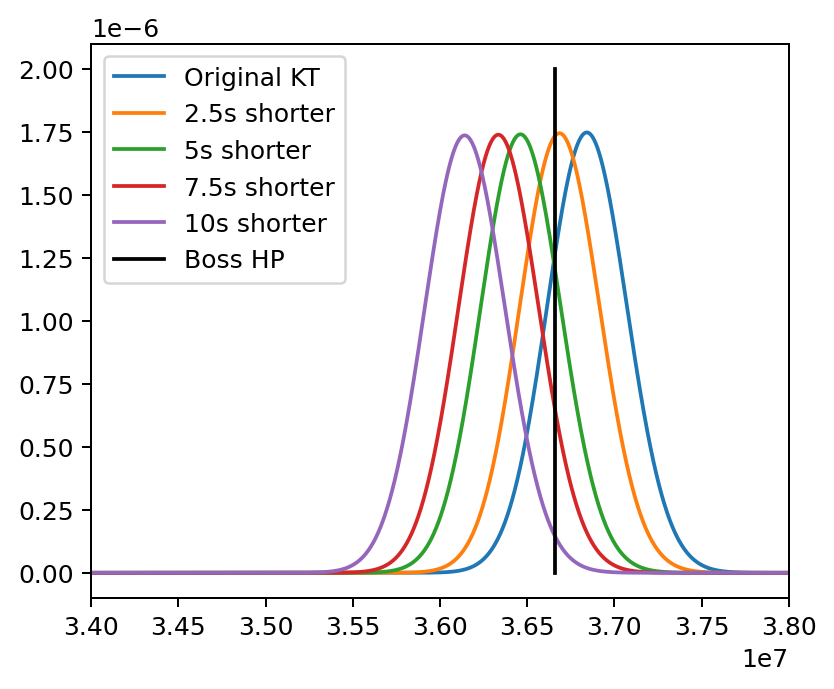

In [31]:
boss_hp = 36660084

truncated_pdf = []
truncated_support = []

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=180)
# plt.plot(party_rotation.party_damage_support, party_rotation.party_damage_distribution)
# for p in party_rotation.shortened_rotations:
#     plt.plot(
#         p.shortened_damage_support,
#         p.shortened_damage_distribution,
#         label=p.seconds_shortened,
#     )

# plt.scatter([true_mean, true_mean], [0, 0])
# plt.scatter([saved_rotation_mean, saved_rotation_mean], [1e-7, 1e-7])
plt.plot(party_support, party_rotation_new, color="C0", label="Original KT")
# plt.plot([rotation_mean, rotation_mean], [0, 2e-6], color="C0")

# for idx, t in enumerate(t_clip):
#     truncated_distribution, truncated_support = rotation_dps_pdf(
#         truncated_rotation_analyses[t], lb_dps=0, dmg_step=20
#     )
#     plt.plot(truncated_support, truncated_distribution, color=f"C{idx+1}")

for idx, t in enumerate(t_clip):
    party_distribution_clipping, party_support_clipping = rotation_dps_pdf(
        clipped_job_analyses[t], lb_dps=0, dmg_step=20
    )
    clipped_mean = sum([a.rotation_mean for a in clipped_job_analyses[t]])

    clip_pdf_temp, clip_support_temp = unconvovle_clipped_pdf(
        party_rotation_new,
        party_distribution_clipping,
        party_support,
        party_support_clipping,
        clipped_mean,
        rotation_mean + lb_damage,
        dmg_step=20,
    )

    truncated_pdf.append(clip_pdf_temp)
    truncated_support.append(clip_support_temp)

    plt.plot(clip_support_temp, clip_pdf_temp, color=f"C{idx+1}", label=f"{t}s shorter")


# for idx, m in enumerate(truncated_means):
#     plt.plot([m, m], [0, 2e-6], color=f"C{idx+1}")

# for idx, m in enumerate(clip_means):
#     plt.scatter([rotation_mean - m, rotation_mean - m], [0, 0], color=f"C{idx+1}")

plt.plot([36660084, 36660084], [0, 2e-6], color="k", label="Boss HP")
plt.legend(loc=2)
plt.xlim([3.4e7, 3.8e7])

(0.0, 100.0)

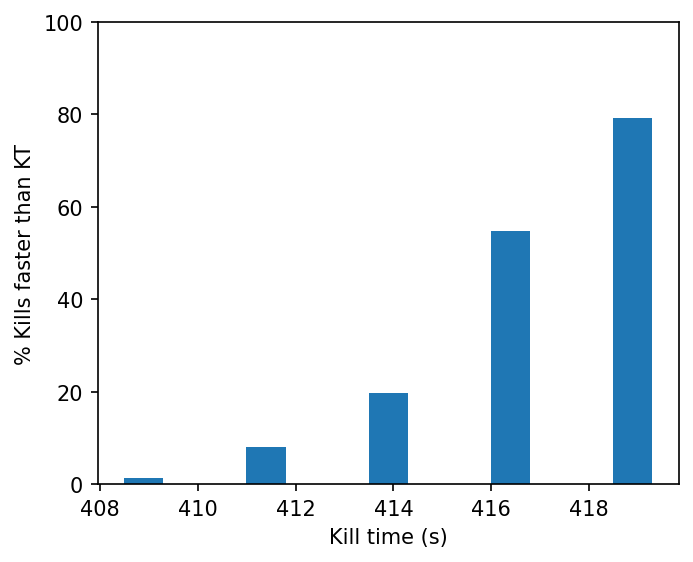

In [36]:
from dmg_distribution import get_dps_dmg_percentile

kill_time = 418.895

x = [kill_time] + [kill_time - t for t in t_clip]
y = np.array(
    [get_dps_dmg_percentile(boss_hp, party_rotation_new, party_support)]
    + [
        get_dps_dmg_percentile(boss_hp, truncated_pdf[i], truncated_support[i])
        for i in range(len(truncated_pdf))
    ]
)

fig, ax = plt.subplots(1,1, figsize=(5,4), dpi=150)
plt.bar(x, 100 - y)
plt.xlabel("Kill time (s)")
plt.ylabel("% Kills faster than KT")
plt.ylim(0, 100)

## Compare unconvolve with truncated rotation

In [65]:
def unconvovle_clipped_pdf(
    rotation_pdf, clipped_pdf, rotation_support, clipped_support, dmg_step=20
):
    # Subtracting pdfs, smallest support value is sum of
    # smallest positive support and largest negative support values
    lower = rotation_support[0] - clipped_support[-1]
    upper = rotation_support[-1] - clipped_support[0]
    # lower, upper = _coarsened_boundaries(lower, upper, dmg_step)
    new_support = np.arange(lower, upper + dmg_step, dmg_step)
    pdf = fftconvolve(rotation_pdf, clipped_pdf)
    return pdf / np.trapz(pdf, new_support), new_support

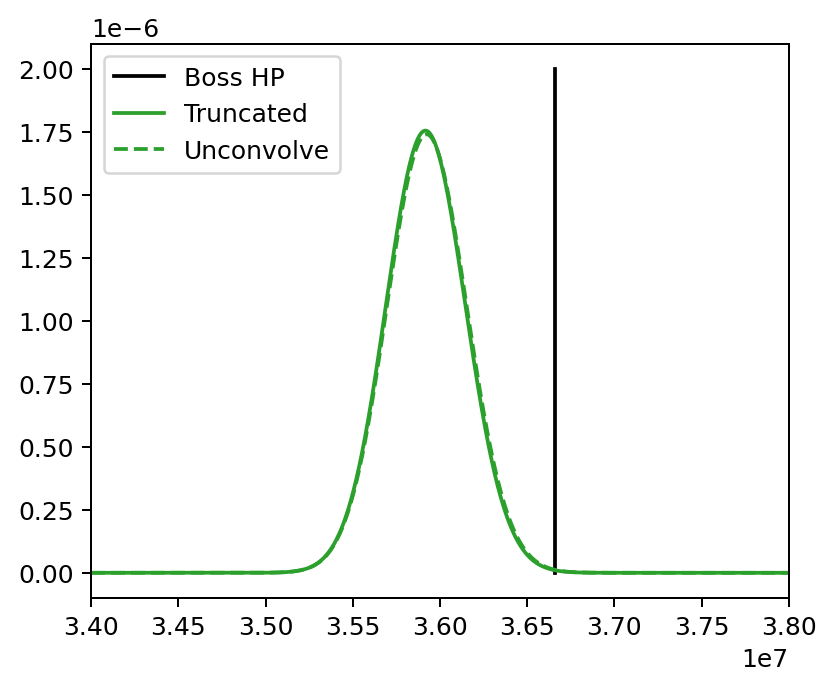

In [92]:
t = 5
idx = 1

fig, ax = plt.subplots(1, 1, figsize=(5, 4), dpi=180)
plt.plot([36660084, 36660084], [0, 2e-6], color="k", label="Boss HP")

# Truncated rotation
truncated_distribution, truncated_support = rotation_dps_pdf(
    truncated_rotation_analyses[t], lb_dps=0, dmg_step=20
)
plt.plot(
    truncated_support, truncated_distribution, color=f"C{idx+1}", label="Truncated"
)

# Unconvolved from full rotation
party_distribution_clipping, party_support_clipping = rotation_dps_pdf(
    clipped_job_analyses[t], lb_dps=0, dmg_step=20
)
clip_pdf, clip_support = unconvovle_clipped_pdf(
    party_rotation_new,
    party_distribution_clipping,
    party_support,
    party_support_clipping,
    dmg_step=20,
)

exact_mean = rotation_mean - sum([a.rotation_mean for a in clipped_job_analyses[t]])
approximate_mean = np.trapz(clip_pdf * clip_support, clip_support)

mean_correction = int(exact_mean - approximate_mean)

plt.plot(
    clip_support + mean_correction,
    clip_pdf,
    "--",
    color=f"C{idx+1}",
    label="Unconvolve",
)
# plt.plot(clip_support, clip_pdf, "--", color=f"C{idx+1}", label="Unconvolve")


plt.legend()
plt.xlim([3.4e7, 3.8e7])
plt.show()

In [69]:
(upper - lower) / 20

1558845.0

In [36]:
print(
    "Clipping mean: ",
    np.trapz(
        party_distribution_clipping * party_support_clipping, party_support_clipping
    ),
)
print(
    "Exact mean: ",
)
sum([a.rotation_mean for a in clipped_job_analyses[t]])

Clipping mean:  381312.75543641957
Exact mean: 


381241.6011180269

The issue seems to be with computing the support after unconvolving

In [74]:
print("unconvolve mean: ", np.trapz(clip_pdf * clip_support, clip_support))
print("truncate mean: ", sum([a.rotation_mean for a in truncated_rotation_analyses[t]]))
print(
    "full - clipping mean:",
    rotation_mean - sum([a.rotation_mean for a in clipped_job_analyses[t]]),
)

unconvolve mean:  35782244.336739294
truncate mean:  35926715.6805846
full - clipping mean: 35926715.6805846


In [84]:
exact_mean = rotation_mean - sum([a.rotation_mean for a in clipped_job_analyses[t]])
approximate_mean = np.trapz(clip_pdf * clip_support, clip_support)

mean_correction = int(exact_mean - approximate_mean)

In [28]:
read_encounter_table()

,report_id,fight_id,encounter_id,encounter_name,kill_time,player_name,player_server,player_id,pet_ids,job,role
0,vLCj2HyYkZRXBxbP,46,88,Kokytos,418.895,Nora Pollenshore,Sargatanas,9,[14],Astrologian,Healer
1,vLCj2HyYkZRXBxbP,46,88,Kokytos,418.895,False Queen,Gilgamesh,1,None,Bard,Physical Ranged
2,vLCj2HyYkZRXBxbP,46,88,Kokytos,418.895,Nobara Kugisaki,Famfrit,8,None,BlackMage,Magical Ranged
3,vLCj2HyYkZRXBxbP,46,88,Kokytos,418.895,Fahl Hayatt,Jenova,7,[16],DarkKnight,Tank
4,vLCj2HyYkZRXBxbP,46,88,Kokytos,418.895,Kaanji Celerey,Diabolos,6,[15],Ninja,Melee
5,vLCj2HyYkZRXBxbP,46,88,Kokytos,418.895,Wulin Tang,Brynhildr,4,None,Samurai,Melee
6,vLCj2HyYkZRXBxbP,46,88,Kokytos,418.895,Acerola Paracletus,Cactuar,3,None,Scholar,Healer
7,vLCj2HyYkZRXBxbP,46,88,Kokytos,418.895,Z'seira Xarynh,Faerie,5,None,Warrior,Tank
